In [1]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv")

## train, test 합치기

In [5]:
train.columns

Index(['date', 'days', 'road_name', 'link_id', 'start_point', 'end_point',
       'direction', 'road_length', 'road_num', 'road_type', 'urban_suburb',
       'district', 'holiday', 'special', 'vacation', 'time', 'inter_num', 'd1',
       'd2', 'd3', 'd4', 'victims', 'severity', 'accident_count',
       'temperature', 'wind', 'rain', 'snow', 'cctv', 'kids', 'speed_limit',
       'entrance', 'signal', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5',
       'month', 'weekend', 'y'],
      dtype='object')

In [7]:
train['train'] = 1

In [8]:
test['train'] = 0

In [9]:
df = pd.concat([train, test])

In [10]:
df.head(5)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,...,SO2,CO,O3,NO2,PM10,PM2.5,month,weekend,y,train
0,20181112,월,언주로,1220024700,개나리아파트,르네상스호텔,하행,484,4.0,주간선도로,...,0.007,0.6,0.002,0.055,36.0,20.0,11,0,28.16,1
1,20180721,토,양재대로,1220000200,구룡사앞,구룡터널,상행,851,4.0,주간선도로,...,0.006,0.3,0.020,0.027,29.0,21.0,7,1,36.57,1
2,20180917,월,영동대로,1220003400,삼성역,코엑스,하행,652,7.0,주간선도로,...,0.005,0.5,0.019,0.037,23.0,11.0,9,0,26.26,1
3,20180630,토,봉은사로,1220031700,봉은교,종합운동장후문,하행,291,2.0,주간선도로,...,0.005,0.5,0.030,0.026,50.0,38.0,6,1,18.26,1
4,20181116,금,남부순환로,1220018500,도곡역,대치역,상행,798,4.0,주간선도로,...,0.006,0.6,0.023,0.029,40.0,28.0,11,0,18.51,1


In [12]:
df.tail(5)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,...,SO2,CO,O3,NO2,PM10,PM2.5,month,weekend,y,train
446881,20180403,화,남부순환로,1220018500,도곡역,대치역,상행,798,4.0,주간선도로,...,0.008,0.4,0.012,0.039,51.0,19.0,4,0,30.90,0
446882,20180317,토,논현로,1220029700,차병원,학동역,하행,792,3.0,주간선도로,...,0.006,0.4,0.014,0.035,22.0,13.0,3,1,21.56,0
446883,20180502,수,언주로,1220024600,르네상스호텔,개나리아파트,상행,484,4.0,주간선도로,...,0.005,0.5,0.012,0.031,42.0,37.0,5,0,21.36,0
446884,20180729,일,도곡로,1220024200,대치동우성아파트,은마아파트입구,하행,625,3.0,보조간선도로,...,0.004,0.3,0.031,0.008,13.0,8.0,7,1,17.96,0
446885,20180212,월,남부순환로,1220022700,탄천1교서측,학여울역,하행,955,4.0,주간선도로,...,0.004,0.4,0.007,0.040,42.0,12.0,2,0,36.64,0


## EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [14]:
!pip install seaborn

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### 요일별

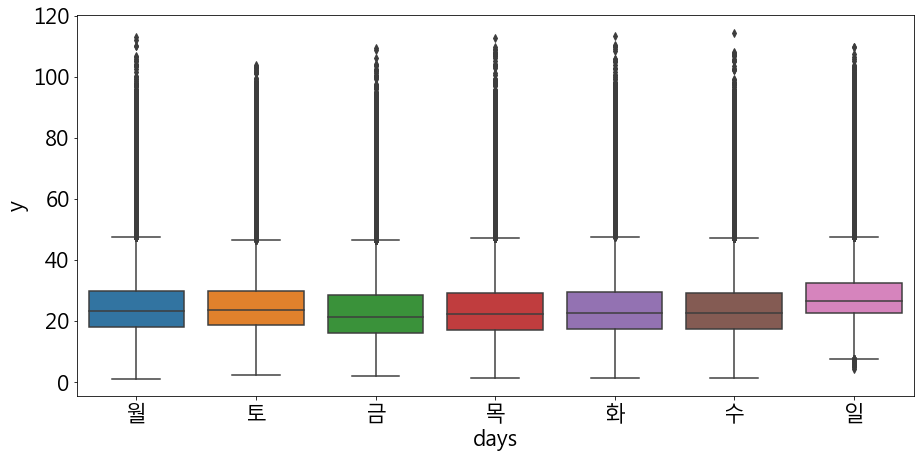

In [28]:
from matplotlib import rc
from matplotlib import rcParams
plt.rc('font',family='Malgun Gothic')
rcParams.update({'font.size': 22})
plt.rc('axes',unicode_minus=False)



plt.figure(figsize = (15,7))
sns.boxplot(x="days", y="y",data = df)
plt.show()

### 시간대별

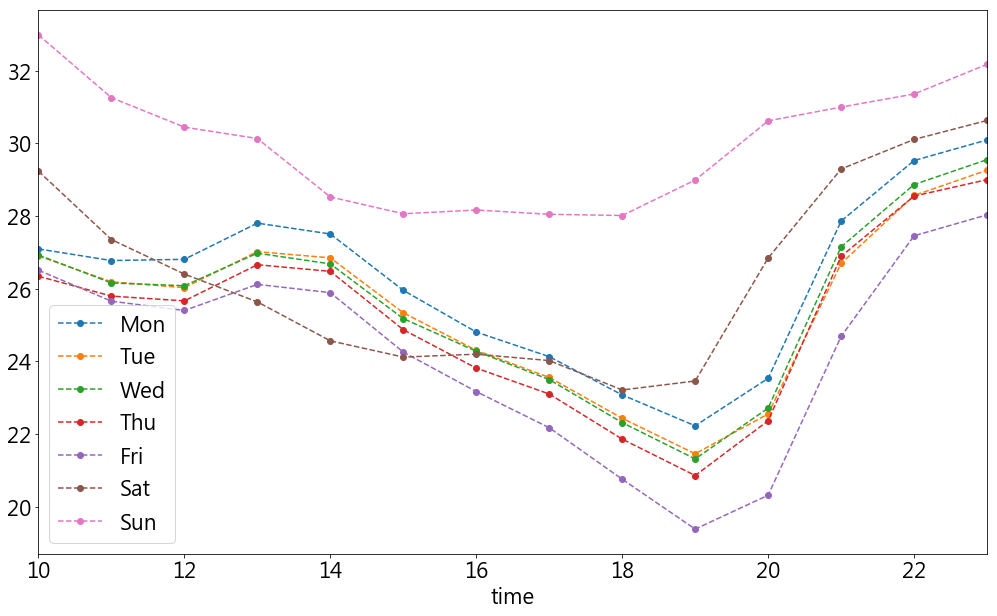

In [59]:
#요일별, 시간대별 평균 속도
days_time = pd.DataFrame(df.groupby(['days','time'])['y'].mean())
days_time = days_time.unstack()
days_time

fig,ax = plt.subplots(figsize=(17,10))
days_time.loc['월', :].plot(label = 'Mon',ls="--",marker="o")
days_time.loc['화', :].plot(label = 'Tue',ls="--",marker="o")
days_time.loc['수', :].plot(label = 'Wed',ls="--",marker="o")
days_time.loc['목', :].plot(label = 'Thu',ls="--",marker="o")
days_time.loc['금', :].plot(label = 'Fri',ls="--",marker="o")
days_time.loc['토', :].plot(label = 'Sat',ls="--",marker="o")
days_time.loc['일', :].plot(label = 'Sun',ls="--",marker="o")

plt.xlabel('time')
ax.xaxis.set_ticklabels(l)
#plt.xticks([range(10,24)])
plt.legend()
plt.show()

In [50]:
list(range(10,24))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [53]:
np.linspace(10,24,1,endpoint=False)

array([ 10.])

In [55]:
l = list([10,12,14,16,18,20,22,24])

In [56]:
l

[10, 12, 14, 16, 18, 20, 22, 24]

In [61]:
def rain_level(rain) :
    if rain >= 30 :
        return 3
    else :
        if rain >=15 :
            return 2
        else :
            if rain >=3 :
                return 1
            else : return 0

def dust_PM2_level(dust) :
    if dust >= 76 :
        return 3
    else :
        if dust >=36 :
            return 2
        else :
            if dust >=16 :
                return 1
            else : return 0      

def dust_PM10_level(dust) :
    if dust >= 151 :
        return 3
    else :
        if dust >=81 :
            return 2
        else :
            if dust >=31 :
                return 1
            else : return 0

def wind_level(wind) :
    if wind >= 14 :
        return 3
    else :
        if wind >=9 :
            return 2
        else :
            if wind >=4 :
                return 1
            else : return 0

def O3_level(O3) :
    if O3 >= 0.151 :
        return 3
    else :
        if O3 >=0.091 :
            return 2
        else :
            if O3 >=0.031 :
                return 1
            else : return 0
            
df['dust_PM10_level'] = df['PM10'].apply(lambda x : dust_PM10_level(x))
df['dust_PM2_level'] = df['PM2.5'].apply(lambda x : dust_PM2_level(x))
df['rain_level'] = df['rain'].apply(lambda x : rain_level(x))       
df['wind_level'] = df['wind'].apply(lambda x : wind_level(x))            
df['O3_level'] = df['O3'].apply(lambda x : O3_level(x))

In [62]:
bins = [-40,-10,10,20,30,50]
bins_names = [0,1,2,3,4] # 구간별 이름
df['temp_level'] = pd.cut(df['temperature'], bins, labels=bins_names)

bins = [0,500,1000,1500,2000,4000]
bins_names = [0,1,2,3,4] # 구간별 이름
df['severity_level'] = pd.cut(df['severity'], bins, labels=bins_names)

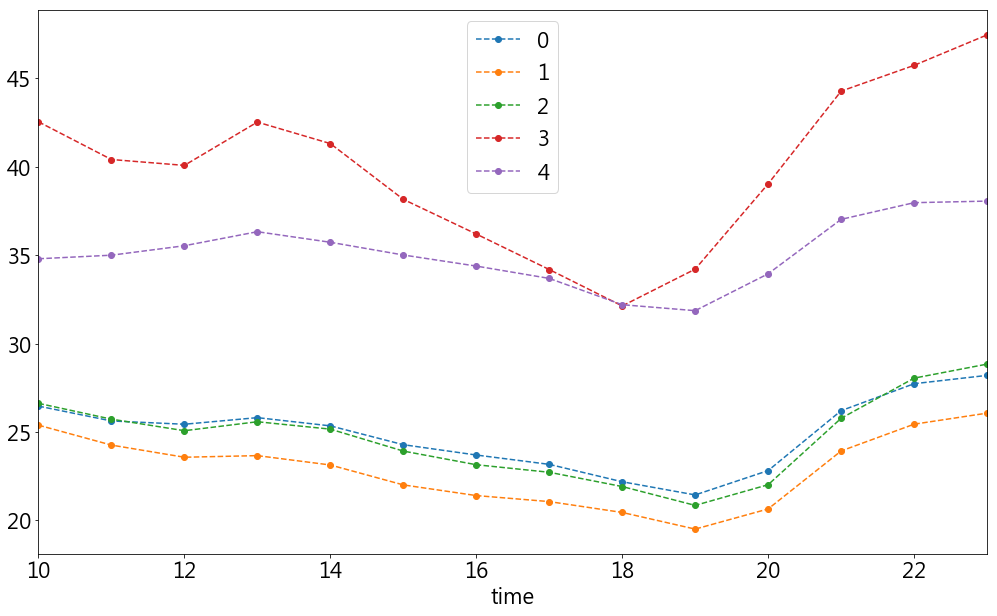

In [67]:
days_time = pd.DataFrame(df.groupby(['severity_level','time'])['y'].mean())
days_time = days_time.unstack()
days_time

fig,ax = plt.subplots(figsize=(17,10))
days_time.iloc[0, :].plot(label = '0',ls="--",marker="o")
days_time.iloc[1, :].plot(label = '1',ls="--",marker="o")
days_time.iloc[2, :].plot(label = '2',ls="--",marker="o")
days_time.iloc[3, :].plot(label = '3',ls="--",marker="o")
days_time.iloc[4, :].plot(label = '4',ls="--",marker="o")

plt.xlabel('time')
ax.xaxis.set_ticklabels(l)
#plt.xticks([range(10,24)])
plt.legend()
plt.show()

In [69]:
df.columns

Index(['date', 'days', 'road_name', 'link_id', 'start_point', 'end_point',
       'direction', 'road_length', 'road_num', 'road_type', 'urban_suburb',
       'district', 'holiday', 'special', 'vacation', 'time', 'inter_num', 'd1',
       'd2', 'd3', 'd4', 'victims', 'severity', 'accident_count',
       'temperature', 'wind', 'rain', 'snow', 'cctv', 'kids', 'speed_limit',
       'entrance', 'signal', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5',
       'month', 'weekend', 'y', 'train', 'dust_PM10_level', 'dust_PM2_level',
       'rain_level', 'wind_level', 'O3_level', 'temp_level', 'severity_level'],
      dtype='object')

In [70]:
np.unique(df.link_id)

array([1210002700, 1210006400, 1210007000, 1210007800, 1210011400,
       1210020000, 1210030400, 1220000100, 1220000200, 1220000300,
       1220000400, 1220000500, 1220000600, 1220000700, 1220000800,
       1220000900, 1220001000, 1220001100, 1220001200, 1220001500,
       1220001600, 1220001700, 1220001800, 1220001900, 1220002000,
       1220002200, 1220002300, 1220002500, 1220002700, 1220002800,
       1220003000, 1220003100, 1220003200, 1220003300, 1220003400,
       1220003800, 1220003900, 1220004000, 1220004100, 1220004200,
       1220004300, 1220004400, 1220004500, 1220004800, 1220004900,
       1220005100, 1220005300, 1220005400, 1220005500, 1220005600,
       1220005700, 1220005800, 1220005900, 1220006100, 1220006300,
       1220006600, 1220006700, 1220006800, 1220006900, 1220007000,
       1220007200, 1220007400, 1220007500, 1220007700, 1220007800,
       1220007900, 1220008000, 1220008100, 1220008200, 1220008300,
       1220008400, 1220008500, 1220008600, 1220008700, 1220009